In [230]:
import sys
sys.path.append('D:/codework/python/pythonReptile/')
from 城市字典 import city_to_province_region
from 人均gdp人口密度等4个字典 import per_gdp_data_2023,population_density,transportation_infrastructure,car_ownership_growth_rate
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [ ]:
file_path = 'D:/junior_year_1st/数据分析/项目/数据采集/re_月、保值率.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

In [ ]:
# 映射区域有关的新字段
data["省份"] = data["车辆所属地"].map(lambda x: city_to_province_region.get(x, {}).get("province", "未知"))
data["区域"] = data["车辆所属地"].map(lambda x: city_to_province_region.get(x, {}).get("region", "未知"))
# 查看更新后的数据
print(data.head(5))


                             标题                                     信息_链接  \
0  2022款 宋MAX新能源 DM-i 105KM 尊荣型  https://www.che300.com/buycar/x381395378   
1         2021款 宋PLUS新能源 EV 尊贵型  https://www.che300.com/buycar/x379073799   
2        2019款 元新能源 EV360 智联悦尚型  https://www.che300.com/buycar/x379582661   
3        2018款 元新能源 EV360 智联尚酷型  https://www.che300.com/buycar/x380525134   
4           2017款 秦新能源 100 1.5T  https://www.che300.com/buycar/x375118138   

    品牌 系列 能源类型  油耗/L  里程/万公里 售价/万元 新车价格/万元    折价额  ...  车辆所属地    排量  \
0  比亚迪  宋   油电  2.01     0.8  8.28   15.78   7.50  ...     宁波  1.5L   
1  比亚迪  宋   纯电     0     4.2  8.85   18.68   9.83  ...     武汉    --   
2  比亚迪  元   纯电     0     6.0   3.2   10.58   7.38  ...     青岛    --   
3  比亚迪  元   纯电     0     8.0   3.2    7.99   4.79  ...     青岛    --   
4  比亚迪  秦   油电   1.2     5.0   3.8   17.39  13.59  ...     上海  1.5T   

         变速箱  颜色      类别 座位数      整车质保   车型   省份  区域  
0  E-CVT无级变速  蓝色     MPV   7  六年或15万公里  NaN  浙江省  华东  


In [233]:
province_list = []
for province in per_gdp_data_2023.keys():
    province_list.append({
        "省份": province,
        "人均GDP": per_gdp_data_2023[province],
        "人口密度": population_density[province],
        "交通基础设施建设水平": transportation_infrastructure[province],
        "汽车保有量增长率": car_ownership_growth_rate[province]
    })
vehicle_data_counts = data["省份"].value_counts().to_dict()
# 通过循环为每个字典元素添加"二手车在售数量"键值对
for element in province_list:
    province_name = element["省份"]
    element["二手车在售数量"] = vehicle_data_counts.get(province_name, 0)

# 创建DataFrame
pl = pd.DataFrame(province_list)
print(pl.columns)

Index(['省份', '人均GDP', '人口密度', '交通基础设施建设水平', '汽车保有量增长率', '二手车在售数量'], dtype='object')


In [234]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(pl[['人均GDP', '人口密度', '交通基础设施建设水平', '汽车保有量增长率', '二手车在售数量']])
pl['KMeans_Cluster'] = kmeans.labels_
print(pl)

      省份  人均GDP    人口密度  交通基础设施建设水平  汽车保有量增长率  二手车在售数量  KMeans_Cluster
0    北京市  20.05  1333.0        1.80       3.5      156               2
1    天津市  12.25  1366.0        1.70       4.2      111               2
2    河北省   5.92   395.0        1.30       5.8      164               0
3    山西省   7.38   239.0        1.20       4.5       71               0
4    内蒙古  10.25    21.0        0.17       6.1       33               0
5    辽宁省   7.20   297.0        1.00       3.2      143               0
6    吉林省   5.75   148.0        0.60       2.8       46               0
7   黑龙江省   5.13    85.0        0.20       2.5       29               0
8    上海市  18.33  3926.0        2.10       2.9      325               1
9    江苏省  14.92   791.0        1.50       5.1      384               3
10   浙江省  12.56   653.0        1.30       4.8     1007               3
11   安徽省   7.69   433.0        1.50       6.3      161               0
12   福建省  12.99   338.0        1.20       5.5       72               0
13   江

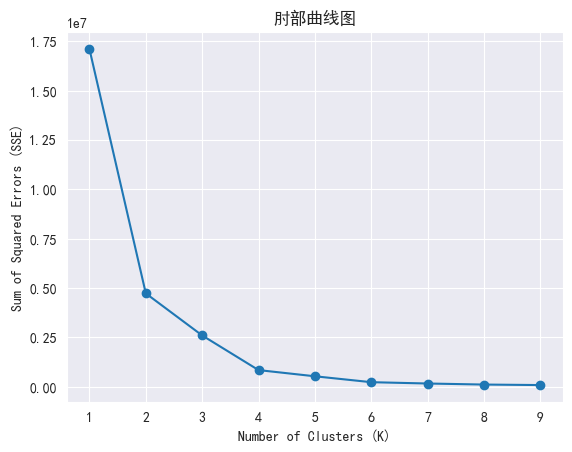

In [237]:
# 提取用于聚类的特征数据
X = pl[['人均GDP', '人口密度', '交通基础设施建设水平', '汽车保有量增长率', '二手车在售数量']]

# 用于存储不同聚类数量下的簇内平方和（SSE）
sse = []

# 尝试不同的聚类数量，这里从1到10，你可以根据实际情况调整范围
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# 绘制肘部曲线
plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('肘部曲线图')
plt.show()

In [236]:
import pandas as pd

# 假设pl是包含聚类结果（KMeans_Cluster列）以及省份信息的数据框
# data是原始的包含各种数据以及省份信息的数据集

# 首先确保pl和data中的省份列名称一致，如果不一致，可进行重命名
# 例如，如果data中的省份列名为"province"，则可以执行以下操作
# data = data.rename(columns={"province": "省份"})

# 通过merge函数基于省份列将pl和data进行合并，以便后续按照聚类结果分类
merged_data = pd.merge(data, pl[["省份", "KMeans_Cluster"]], on="省份")

# 按照KMeans_Cluster列的值（也就是聚类分类）将数据分为四个簇
cluster_0_data = merged_data[merged_data["KMeans_Cluster"] == 0]
cluster_1_data = merged_data[merged_data["KMeans_Cluster"] == 1]
cluster_2_data = merged_data[merged_data["KMeans_Cluster"] == 2]
cluster_3_data = merged_data[merged_data["KMeans_Cluster"] == 3]

# 可以查看每个簇的数据情况（示例打印前5行数据）
print("Cluster 0 Data (First 5 rows):")
print(cluster_0_data.head(5))
print("Cluster 1 Data (First 5 rows):")
print(cluster_1_data.head(5))
print("Cluster 2 Data (First 5 rows):")
print(cluster_2_data.head(5))
print("Cluster 3 Data (First 5 rows):")
print(cluster_3_data.head(5))

Cluster 0 Data (First 5 rows):
                                    标题  \
1                2021款 宋PLUS新能源 EV 尊贵型   
5      2018款 唐新能源 DM 2.0T 全时四驱智联创悦型 7座   
7                2015款 唐新能源 2.0T 四驱尊贵型   
8   2018款 名爵6新能源 45T E-DRIVE智驱混动尊享互联网版   
10     2023款 宋Pro新能源 冠军版 DM-i 110KM超越型   

                                       信息_链接   品牌      系列 能源类型  油耗/L  里程/万公里  \
1   https://www.che300.com/buycar/x379073799  比亚迪       宋   纯电     0     4.2   
5   https://www.che300.com/buycar/x380788807  比亚迪       唐   油电   1.8     6.5   
7   https://www.che300.com/buycar/x380316571  比亚迪       唐   油电   2.4     6.0   
8   https://www.che300.com/buycar/x379056820   名爵  名爵6新能源   油电   1.5     6.3   
10  https://www.che300.com/buycar/x379089143  比亚迪       宋   油电  1.98     0.9   

   售价/万元 新车价格/万元    折价额  ...    排量        变速箱  颜色      类别 座位数      整车质保   车型  \
1   8.85   18.68   9.83  ...    --         单速  灰色  紧凑型SUV   5  六年或15万公里  NaN   
5    6.2   23.99  17.79  ...  2.0T   6挡 湿式双离合  白色   中型SUV   7  六年或15万公里  Na

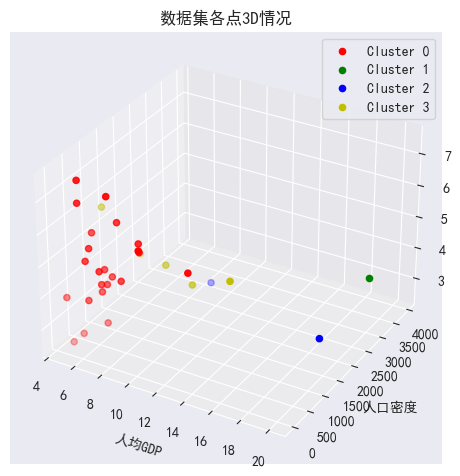

In [242]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 假设pl是已经处理好的数据框，包含了相关特征列，如人均GDP、人口密度、汽车保有量增长率等，以及聚类结果列'KMeans_Cluster'
# 提取相应列的数据用于绘图
x = pl['人均GDP']
y = pl['人口密度']
z = pl['汽车保有量增长率']
cluster_labels = pl['KMeans_Cluster']

# 创建颜色映射，这里简单示例使用4种不同颜色区分不同聚类类别（你可根据实际聚类数量调整）
colors = ['r', 'g', 'b', 'y']
# 创建3D图形对象
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 按照聚类标签给不同类别的点绘制不同颜色的散点图
for i in range(len(set(cluster_labels))):
    mask = (cluster_labels == i)
    ax.scatter(x[mask], y[mask], z[mask], c=colors[i], label=f'Cluster {i}')

# 设置坐标轴标签
ax.set_xlabel('人均GDP')
ax.set_ylabel('人口密度')
ax.set_zlabel('汽车保有量增长率')

# 设置图形标题
ax.set_title('数据集各点3D情况')
# 添加图例
ax.legend()
# 增加边距
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)
# 显示图形
plt.show()